In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
from src.data_loader import load_dataset
from src.qboost_model import QBoostClassifier
from src.benchmark import  evaluate_model
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
X_train, X_test, y_train, y_test = load_dataset()

In [52]:
models = [
    ("QBoost", QBoostClassifier(n_classifiers=10, regularization=0.0001,
                                max_depth=2, reps=1, maxiter=50)),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100))
]

In [53]:
results = {}

In [54]:
for name, model in models:
    y_true, y_pred = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    results[name] = (y_true, y_pred)


📊 QBoost
  Accuracy : 0.3506
  F1 Score : 0.5192
  Precision: 0.3506
  Recall   : 1.0000

📊 Logistic Regression
  Accuracy : 0.7359
  F1 Score : 0.5793
  Precision: 0.6562
  Recall   : 0.5185

📊 Random Forest
  Accuracy : 0.7662
  F1 Score : 0.6351
  Precision: 0.7015
  Recall   : 0.5802

📊 Gradient Boosting
  Accuracy : 0.7662
  F1 Score : 0.6447
  Precision: 0.6901
  Recall   : 0.6049


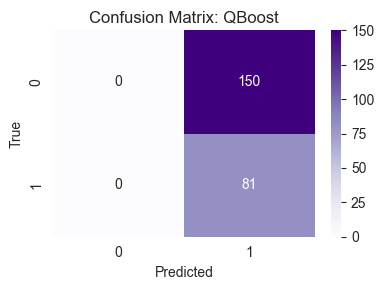

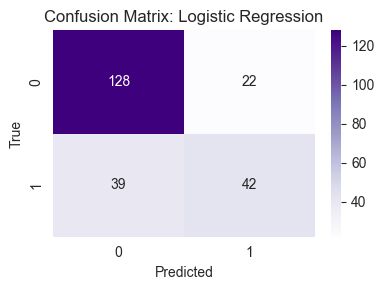

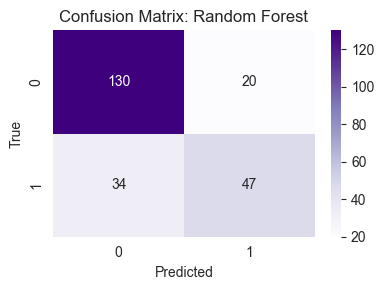

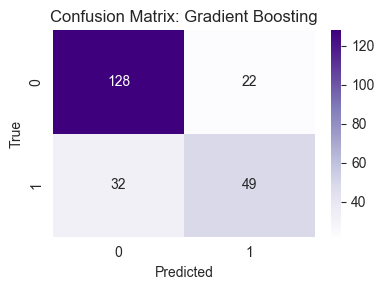

In [60]:
for name, (y_true, y_pred) in results.items():
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()